In [5]:
import pandas as pd
import json

def load_data(file_path, lines=True):
    data = []
    with open(file_path, 'r') as file:
        if lines:
            for line in file:
                data.append(json.loads(line))
        else:
            data = json.load(file)
    return pd.DataFrame(data)

In [6]:
business_data_path = '/Users/yixie/Downloads/yelp_academic_dataset_business.json'
business_df = load_data(business_data_path)
print(business_df.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [7]:
business_df[business_df['city'] == 'Philadelphia']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150320,wPAaAbFbq5wfLfW0gnYU7g,Intermix,1718 Walnut St,Philadelphia,PA,19103,39.950060,-75.170129,2.0,10,0,"{'BusinessParking': '{'garage': False, 'street...","Fashion, Shopping, Women's Clothing","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
150326,JDM7kiCEmeBc_5W-z6eZZw,2601 Parkway Apartments,2601 Pennsylvania Ave,Philadelphia,PA,19130,39.968806,-75.180608,3.0,6,1,{'BusinessAcceptsCreditCards': 'True'},"Real Estate, Apartments, Home Services",None
150329,9U1Igcpe954LoWZRmNc-zg,Hand & Stone Massage And Facial Spa,"1100 S Columbus Blvd, Ste 24",Philadelphia,PA,19147,39.932756,-75.144504,3.0,32,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Day Spas, Beauty & Spas, Skin Care, Massage","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ..."
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


In [13]:
import json

# Specify the input and output file paths
input_file_path = '/Users/yixie/Downloads/yelp_academic_dataset_review.json'
output_file_prefix = 'file'

def chunk_json_file(input_file, chunk_size):
    with open(input_file, 'r') as infile:
        chunk = []
        chunk_count = 0

        for line in infile:
            try:
                item = json.loads(line.strip())
                chunk.append(item)

                if len(chunk) == chunk_size:
                    # Save the chunk to a new file
                    output_file_path = f'{output_file_prefix}_{chunk_count}.json'
                    with open(output_file_path, 'w') as outfile:
                        json.dump(chunk, outfile)
                    chunk = []
                    chunk_count += 1
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")

        # Save the last chunk if any items are remaining
        if chunk:
            output_file_path = f'{output_file_prefix}_{chunk_count}.json'
            with open(output_file_path, 'w') as outfile:
                json.dump(chunk, outfile)

# Specify your desired chunk size
chunk_size = 1000

# Call the function to create chunks
chunk_json_file(input_file_path, chunk_size)


In [14]:
import json

# Specify the file path of one of the output files
output_file_path = 'file_0.json'

# Load and print the contents of the file
with open(output_file_path, 'r') as infile:
    chunk_data = json.load(infile)
    print(chunk_data)


[{'review_id': 'KU_O5udG6zpxOg-VcAEodg', 'user_id': 'mh_-eMZ6K5RLWhZyISBhwA', 'business_id': 'XQfwVwDr-v0ZS3_CbbE5Xw', 'stars': 3.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': "If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.", 'date': '2018-07-07 22:09:11'}, {'review_id': 'BiTunyQ73aT9WBnpR9DZGw', 'user_id': 'OyoGAe7OKpv6SyGZT5g77Q', 'business_id': '7ATYjTIgM3jUlt4UM3IypQ', 'stars': 5.0, 'useful': 1, 'funny': 0, 'cool': 1, 'text': "I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cy

In [21]:
df = pd.DataFrame(chunk_data)
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
995,XMWg7adwVBKqIl_e_TTtuA,syyKcKPFILDysHWmtka-aA,1_hDCN3iioFR3XnUr32ZtA,5.0,0,0,0,I Recently vacationed in St. Petersburg with m...,2014-06-28 03:00:56
996,BGZ3GtcXhtIEPIkyLVuKDQ,_lgLNzpzf3qmbwySBakxEw,5RzJ2bjU8bLSaN5SuiUpYA,4.0,1,0,1,Very cool bar attached to the Alexander Hotel....,2016-01-17 16:45:19
997,lm7Q8pH26kqx1gbjCJ16ZQ,Sh_vUlHHY2Kuj14eF8NYZQ,s1PNBO9o5jIgNd5YWUDLXQ,5.0,1,0,0,This hotel is a gem in the heart of Philadelph...,2016-02-23 21:31:39
998,Lo2giVeSNDvatEAGZRikWQ,YwMD-AVT67fmYRGxnlRSPA,alUk6OwNhofyc90NDMDY-Q,5.0,7,1,0,Was taken here today by a Colombian friend who...,2010-08-22 01:54:23


In [19]:
merged_df = pd.merge(df, business_df, on='business_id', how='left')

# Print the merged DataFrame
merged_df

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,XMWg7adwVBKqIl_e_TTtuA,syyKcKPFILDysHWmtka-aA,1_hDCN3iioFR3XnUr32ZtA,5.0,0,0,0,I Recently vacationed in St. Petersburg with m...,2014-06-28 03:00:56,Dooners,...,FL,33701,27.771801,-82.636908,3.5,109,0,"{'BusinessParking': '{'garage': False, 'street...","Fast Food, Turkish, German, Greek, Mediterrane...","{'Monday': '11:30-15:0', 'Tuesday': '11:30-15:..."
996,BGZ3GtcXhtIEPIkyLVuKDQ,_lgLNzpzf3qmbwySBakxEw,5RzJ2bjU8bLSaN5SuiUpYA,4.0,1,0,1,Very cool bar attached to the Alexander Hotel....,2016-01-17 16:45:19,Plat 99,...,IN,46204,39.761769,-86.154336,4.5,206,1,"{'NoiseLevel': 'u'average'', 'OutdoorSeating':...","Event Planning & Services, Art Galleries, Hote...","{'Thursday': '19:0-22:0', 'Friday': '19:0-22:0..."
997,lm7Q8pH26kqx1gbjCJ16ZQ,Sh_vUlHHY2Kuj14eF8NYZQ,s1PNBO9o5jIgNd5YWUDLXQ,5.0,1,0,0,This hotel is a gem in the heart of Philadelph...,2016-02-23 21:31:39,The Independent Hotel,...,PA,19107,39.947781,-75.162146,3.5,123,0,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
998,Lo2giVeSNDvatEAGZRikWQ,YwMD-AVT67fmYRGxnlRSPA,alUk6OwNhofyc90NDMDY-Q,5.0,7,1,0,Was taken here today by a Colombian friend who...,2010-08-22 01:54:23,Fabio's Chicken Restaurant Takeout,...,PA,19120,40.023288,-75.123764,4.5,14,1,"{'HasTV': 'True', 'BusinessParking': '{'garage...","Latin American, Restaurants, Chicken Wings",None


In [20]:
merged_df[merged_df['city'] == 'Philadelphia']

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,Dmitri's,...,PA,19147,39.938013,-75.148131,4.0,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."
13,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,LaScala's,...,PA,19106,39.949529,-75.152139,3.5,367,0,"{'RestaurantsReservations': 'True', 'BYOBCorka...","Pizza, Restaurants, Italian, Salad","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
16,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,Rittenhouse Grill,...,PA,19103,39.948949,-75.169532,3.5,290,1,"{'RestaurantsAttire': 'u'dressy'', 'Restaurant...","Wine Bars, Restaurants, Nightlife, Steakhouses...","{'Wednesday': '16:30-22:0', 'Thursday': '16:30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Hvw1Hxmla7phoWVpyxBCHQ,ncWuUSITGNp8Q2-WHjtCLw,u7_3L1NBWgxhBM_B-cmmnA,2.0,0,0,0,I could be craving pizza and be walking by and...,2014-11-12 18:28:06,Pizzeria Vetri,...,PA,19130,39.960888,-75.171213,4.0,651,1,"{'GoodForKids': 'True', 'HasTV': 'False', 'Bus...","Italian, Pizza, Restaurants, Salad","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
989,z9s96krlSZRoN0XKzCVbAA,Dg2AUgE5DeN9MzAbVk40Vg,8hgo446H2HoYlZocEi1SJw,5.0,0,0,0,This is a great place to bring the kids to. Th...,2013-01-27 18:29:40,Paris Baguette,...,PA,19126,40.054636,-75.126113,4.0,32,1,"{'BusinessParking': '{'garage': False, 'street...","Bakeries, Food",None
997,lm7Q8pH26kqx1gbjCJ16ZQ,Sh_vUlHHY2Kuj14eF8NYZQ,s1PNBO9o5jIgNd5YWUDLXQ,5.0,1,0,0,This hotel is a gem in the heart of Philadelph...,2016-02-23 21:31:39,The Independent Hotel,...,PA,19107,39.947781,-75.162146,3.5,123,0,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
998,Lo2giVeSNDvatEAGZRikWQ,YwMD-AVT67fmYRGxnlRSPA,alUk6OwNhofyc90NDMDY-Q,5.0,7,1,0,Was taken here today by a Colombian friend who...,2010-08-22 01:54:23,Fabio's Chicken Restaurant Takeout,...,PA,19120,40.023288,-75.123764,4.5,14,1,"{'HasTV': 'True', 'BusinessParking': '{'garage...","Latin American, Restaurants, Chicken Wings",None


In [58]:
# maximum chunk
output_file_path = 'file_6990.json'

# Load and print the contents of the file
with open(output_file_path, 'r') as infile:
    chunk_data1 = json.load(infile)
    print(chunk_data1)


[{'review_id': 'nN1EWUFB6G5vXLCGMnFpow', 'user_id': 'V5jfkywq-f4FpvDrUJMdfw', 'business_id': 'Zg83olSjsdXAhE5EEy5IcQ', 'stars': 5.0, 'useful': 1, 'funny': 0, 'cool': 0, 'text': 'This has been one of our favorite restaurants since before we moved to Tucson. For the price, the amount and quality of food received is pretty great. Most outstanding is the friendly, prompt service we have always received, even when the location is very busy. Definitely try the guacatony!!', 'date': '2014-07-19 05:25:16'}, {'review_id': 'gs6qP-N4oV-Fr8dpqowiIQ', 'user_id': 'l3YDgKIUhVLXKq8fYOR5NA', 'business_id': 'YGXh3EWuaZHWucYfyxQFUg', 'stars': 5.0, 'useful': 25, 'funny': 2, 'cool': 0, 'text': "I recently graduated from Galen and passed my NCLEX RN on the first attempt with around 90 questions. I was in the ADN program and will be starting the RN-BSN program within the next few weeks. \nYes- this school is expensive. It's a private school, which are always expensive. However, you get right into the program

In [61]:
import json
import pandas as pd

# Specify the file path of the output file (change to the desired file)
output_file_path = 'file_6990.json'

# Load chunk
with open(output_file_path, 'r') as infile:
    chunk_data = json.load(infile)

# Convert chunk to DataFrame (if it's a list of dictionaries)
chunk_df = pd.DataFrame(chunk_data)

# Assuming business_df is your business DataFrame
# Replace 'business_id' with the actual column name containing business IDs in your DataFrame
merged_chunk = pd.merge(chunk_df, business_df, on='business_id', how='left')

# Count ratings for each city in the chunk
city_counts = merged_chunk['city'].value_counts()

# Find the city with the most ratings
most_rated_city = city_counts.idxmax()
most_ratings_count = city_counts.max()

print(f"For the chunk in file {output_file_path}, the city with the most ratings is {most_rated_city} with {most_ratings_count} ratings.")


For the chunk in file file_6990.json, the city with the most ratings is Philadelphia with 39 ratings.


In [67]:
import json
import pandas as pd
# List to store results for each chunk
results_per_chunk = []

# Loop through all chunk files (file_01.json to file_1000.json)
for chunk_num in range(1, 1001):
    # Generate the file path for the current chunk
    output_file_path = f'file_{chunk_num:d}.json'

    # Load chunk
    with open(output_file_path, 'r') as infile:
        chunk_data = json.load(infile)

    # Convert chunk to DataFrame (if it's a list of dictionaries)
    chunk_df = pd.DataFrame(chunk_data)

    # Merge with business DataFrame
    merged_chunk = pd.merge(chunk_df, business_df, on='business_id', how='left')

    # Count ratings for each city in the chunk
    city_counts = merged_chunk['city'].value_counts()

    # Find the city with the most ratings
    most_rated_city = city_counts.idxmax()
    most_ratings_count = city_counts.max()

    # Store results for the current chunk
    results_per_chunk.append((output_file_path, most_rated_city, most_ratings_count))

# Display results for each chunk
for result in results_per_chunk:
    print(f"For the chunk in file {result[0]}, the city with the most ratings is {result[1]} with {result[2]} ratings.")


For the chunk in file file_1.json, the city with the most ratings is Philadelphia with 183 ratings.
For the chunk in file file_2.json, the city with the most ratings is Philadelphia with 170 ratings.
For the chunk in file file_3.json, the city with the most ratings is Philadelphia with 152 ratings.
For the chunk in file file_4.json, the city with the most ratings is Philadelphia with 158 ratings.
For the chunk in file file_5.json, the city with the most ratings is Philadelphia with 181 ratings.
For the chunk in file file_6.json, the city with the most ratings is Philadelphia with 198 ratings.
For the chunk in file file_7.json, the city with the most ratings is Philadelphia with 192 ratings.
For the chunk in file file_8.json, the city with the most ratings is Philadelphia with 173 ratings.
For the chunk in file file_9.json, the city with the most ratings is Philadelphia with 157 ratings.
For the chunk in file file_10.json, the city with the most ratings is Philadelphia with 188 ratings.

In [69]:
merged_dfs = []

# Loop through all chunk files (file_01.json to file_1000.json)
for chunk_num in range(1, 6990):
    # Generate the file path for the current chunk
    output_file_path = f'file_{chunk_num:d}.json'

    # Load chunk
    with open(output_file_path, 'r') as infile:
        chunk_data = json.load(infile)

    # Convert chunk to DataFrame (if it's a list of dictionaries)
    chunk_df = pd.DataFrame(chunk_data)

    # Merge with business DataFrame
    merged_chunk = pd.merge(chunk_df, business_df, on='business_id', how='left')

    # Filter for rows where the city is 'Philadelphia'
    philadelphia_data = merged_chunk[merged_chunk['city'] == 'Philadelphia']

    # Append to the list
    merged_dfs.append(philadelphia_data)

# Concatenate all DataFrames in the list into a single DataFrame
final_merged_df = pd.concat(merged_dfs, ignore_index=True)

# Display the final merged DataFrame
final_merged_df


,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,2fA_8TK24PULHnFz4CE_JA,B7d4_zvYzjE1D-E2fSw9LA,gGyqnAlpFrka_qzpO7j4lQ,2.0,1,5,2,To the other reviewers \nYou are reviewing the...,2009-05-19 19:12:28,Citizens Bank Park,...,PA,19176,39.905993,-75.166640,4.5,515,1,"{'GoodForKids': 'True', 'DogsAllowed': 'False'...","Active Life, Baseball Fields, Stadiums & Arena...",None
1,D9Toy0Ve0j77tp2iHVW3HA,92KVnXQL9KH5A_aX-lnEdA,NeY1bH6IKJxnn4YAixibsQ,2.0,0,0,0,"Good menu, solid ingredients, but these folks ...",2014-04-19 19:45:40,Cosi,...,PA,19104,39.953671,-75.194957,2.5,115,0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Coffee & Tea, Restaurants, Sandwiches, Food","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
2,M7AGmOpm0PzSdSmP8dA_3A,OXmETnil1QAshKPioX8qjg,qjGS_7iaQDpbVhS6W8qkHQ,5.0,2,0,0,This place is absolutely amazing. A cute littl...,2016-01-17 06:11:00,The Sweet Life Bakeshop,...,PA,19147,39.942203,-75.155223,5.0,316,1,"{'BusinessAcceptsBitcoin': 'False', 'NoiseLeve...","Food, Cupcakes, Desserts, Bakeries","{'Monday': '0:0-0:0', 'Tuesday': '11:0-18:30',..."
3,gIUerFG2uz_nJo4lpqKgJA,toOnaUdZoYbdGU6MP8Gu9g,lkPAmyZDva5Bt4EaqzjS8g,5.0,1,0,0,In love with my haircut! Very reasonable price...,2018-03-15 21:20:03,Kevin's Hair Salon,...,PA,19147,39.934859,-75.153675,3.0,15,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Beauty & Spas, Nail Salons, Hair Salons, Hair ...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-19:30'..."
4,QyvqHQzpNS1Zdiy88BIb3w,YHzVud8gFNn1MLAKsek_Iw,dfKF-oAUf3yjnD0WBYDyZQ,5.0,0,0,0,We tried these at the Collingswood Art Festiva...,2013-08-18 17:41:05,The Cow and The Curd,...,PA,19149,40.048754,-75.062078,4.0,117,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Food Trucks",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967322,dZR89NmQJR3VtCw3Q2MXww,Y0MjA5a67vfzttu7TENETQ,QGYzYUMsQe6k7__LD91E5w,5.0,1,0,1,Really good bahn mi sandwiches in Chinatown!\n...,2022-01-17 14:36:56,QT Vietnamese Sandwich,...,PA,19107,39.953229,-75.156582,4.5,538,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Vietnamese, Restaurants, Sandwiches, Specialty...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '..."
967323,BOTpJP2dh8pej0xZ-w9LdQ,StyRL27Qj1Cy-yRBFuLSAQ,JHRlwxxKY0JJcU97rJ-Bug,4.0,1,0,1,A good place for some quiet happy hour drinks....,2019-12-31 23:01:45,Cuba Libre Restaurant & Rum Bar - Philadelphia,...,PA,19106,39.949589,-75.143910,3.5,1195,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Nightlife, Cuban, Breakfast & Brunch, Latin Am...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ..."
967324,fb_xKUoJb-A2wWTSmFndfg,pGmbV55YLG54t8r1W4F3xg,-1B9pP_CrRBJYPICE5WbRA,5.0,1,0,1,Spice 28 is a great happy hour option in the h...,2021-11-08 15:15:45,Spice 28,...,PA,19107,39.950352,-75.161583,4.0,822,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': '...","Asian Fusion, Restaurants, American (New), Tha...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30..."
967325,2K_TCx1zNTbYjUc_B4_wZA,IU21A35P9AOaG8sgeuCTbA,xTCSNzu7387VHOPO7DkEzA,3.0,0,0,0,Yes I am a fan...There are many overwhelming p...,2013-12-30 11:21:29,"The Notary Hotel, Autograph Collection",...,PA,19107,39.953083,-75.162187,3.5,286,1,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...","Caterers, Hotels & Travel, Event Planning & Se...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [75]:
final_merged_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [109]:
ff = final_merged_df['date'].astype(str).str[:4]
pd.to_numeric(ff,errors = 'coerce').describe()

count    967327.000000
mean       2015.472440
std           3.380668
min        2005.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2022.000000
Name: date, dtype: float64

In [76]:
print(final_merged_df.describe())

             stars_x         useful          funny           cool  \
count  967327.000000  967327.000000  967327.000000  967327.000000   
mean        3.785662       1.297065       0.404677       0.574951   
std         1.388231       3.018900       1.703322       2.098384   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         5.000000       2.000000       0.000000       1.000000   
max         5.000000     320.000000     284.000000     192.000000   

            latitude      longitude        stars_y   review_count  \
count  967327.000000  967327.000000  967327.000000  967327.000000   
mean       39.962187     -75.160156       3.783088     486.901473   
std         0.038023       0.038714       0.702474     775.737225   
min        39.864924     -75.651673       1.000000       5.000000   
25%        39.947327     -75.1725

In [77]:
print(final_merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967327 entries, 0 to 967326
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   review_id     967327 non-null  object 
 1   user_id       967327 non-null  object 
 2   business_id   967327 non-null  object 
 3   stars_x       967327 non-null  float64
 4   useful        967327 non-null  int64  
 5   funny         967327 non-null  int64  
 6   cool          967327 non-null  int64  
 7   text          967327 non-null  object 
 8   date          967327 non-null  object 
 9   name          967327 non-null  object 
 10  address       967327 non-null  object 
 11  city          967327 non-null  object 
 12  state         967327 non-null  object 
 13  postal_code   967327 non-null  object 
 14  latitude      967327 non-null  float64
 15  longitude     967327 non-null  float64
 16  stars_y       967327 non-null  float64
 17  review_count  967327 non-null  int64  
 18  is_o

In [78]:
print(final_merged_df.isnull().sum())

review_id           0
user_id             0
business_id         0
stars_x             0
useful              0
funny               0
cool                0
text                0
date                0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars_y             0
review_count        0
is_open             0
attributes      21974
categories         63
hours           57216
dtype: int64


In [79]:
for column in final_merged_df.columns:
    unique_values = final_merged_df[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in review_id: 967327
Unique values in user_id: 279827
Unique values in business_id: 14569
Unique values in stars_x: 5
Unique values in useful: 138
Unique values in funny: 106
Unique values in cool: 121
Unique values in text: 965577
Unique values in date: 965057
Unique values in name: 12783
Unique values in address: 10883
Unique values in city: 1
Unique values in state: 2
Unique values in postal_code: 90
Unique values in latitude: 12817
Unique values in longitude: 12378
Unique values in stars_y: 9
Unique values in review_count: 680
Unique values in is_open: 2


TypeError: unhashable type: 'dict'

In [110]:
final_merged_df['funny']

0         5
1         0
2         0
3         0
4         0
         ..
967322    0
967323    0
967324    0
967325    0
967326    0
Name: funny, Length: 967327, dtype: int64

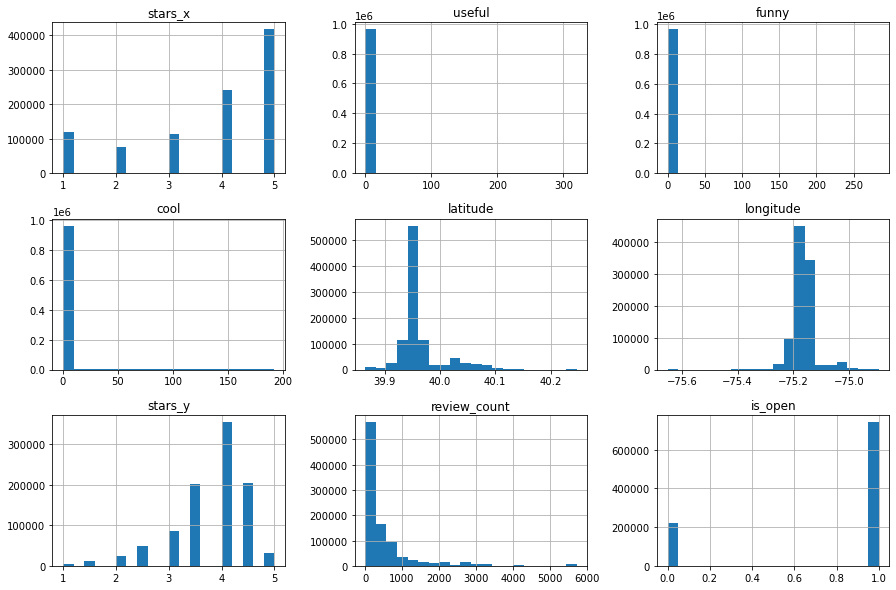

In [80]:
import matplotlib.pyplot as plt

numerical_columns = final_merged_df.select_dtypes(include=['int64', 'float64']).columns
final_merged_df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.show()


In [84]:
correlation_matrix = final_merged_df.corr()
print(correlation_matrix)

               stars_x    useful     funny      cool  latitude  longitude  \
stars_x       1.000000 -0.072022 -0.056369  0.068739 -0.028932   0.003799   
useful       -0.072022  1.000000  0.612079  0.767370  0.011554   0.003172   
funny        -0.056369  0.612079  1.000000  0.680392 -0.012496   0.001390   
cool          0.068739  0.767370  0.680392  1.000000 -0.023323  -0.005756   
latitude     -0.028932  0.011554 -0.012496 -0.023323  1.000000   0.429268   
longitude     0.003799  0.003172  0.001390 -0.005756  0.429268   1.000000   
stars_y       0.481501 -0.035059 -0.032086  0.043559 -0.055787   0.009103   
review_count  0.069968 -0.057776 -0.010558 -0.005951 -0.155710  -0.028046   
is_open       0.054466  0.003089 -0.006064  0.003033  0.032607   0.032475   

               stars_y  review_count   is_open  
stars_x       0.481501      0.069968  0.054466  
useful       -0.035059     -0.057776  0.003089  
funny        -0.032086     -0.010558 -0.006064  
cool          0.043559     -0.005

In [ ]:
numerical_columns = final_merged_df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.scatter(final_merged_df[column], final_merged_df['stars_x'])
    plt.title(f'Scatter plot of stars_x against {column}')
    plt.xlabel(column)
    plt.ylabel('stars_x')
    plt.show()


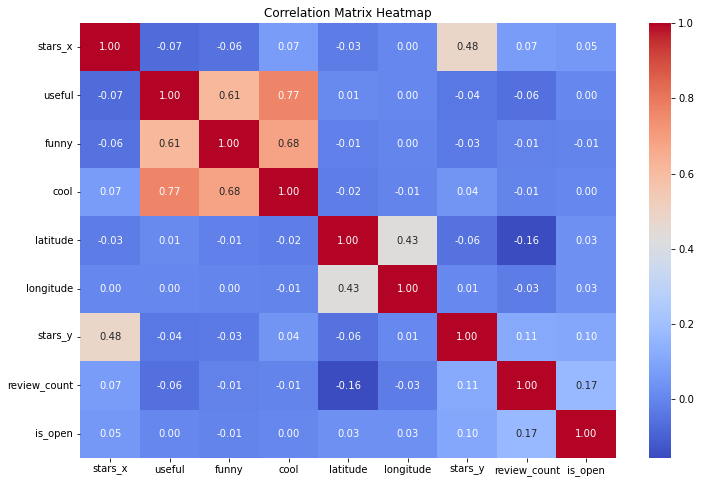

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [88]:
final_merged_df

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,2fA_8TK24PULHnFz4CE_JA,B7d4_zvYzjE1D-E2fSw9LA,gGyqnAlpFrka_qzpO7j4lQ,2.0,1,5,2,To the other reviewers \nYou are reviewing the...,2009-05-19 19:12:28,Citizens Bank Park,...,PA,19176,39.905993,-75.166640,4.5,515,1,"{'GoodForKids': 'True', 'DogsAllowed': 'False'...","Active Life, Baseball Fields, Stadiums & Arena...",None
1,D9Toy0Ve0j77tp2iHVW3HA,92KVnXQL9KH5A_aX-lnEdA,NeY1bH6IKJxnn4YAixibsQ,2.0,0,0,0,"Good menu, solid ingredients, but these folks ...",2014-04-19 19:45:40,Cosi,...,PA,19104,39.953671,-75.194957,2.5,115,0,"{'RestaurantsGoodForGroups': 'True', 'Business...","Coffee & Tea, Restaurants, Sandwiches, Food","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
2,M7AGmOpm0PzSdSmP8dA_3A,OXmETnil1QAshKPioX8qjg,qjGS_7iaQDpbVhS6W8qkHQ,5.0,2,0,0,This place is absolutely amazing. A cute littl...,2016-01-17 06:11:00,The Sweet Life Bakeshop,...,PA,19147,39.942203,-75.155223,5.0,316,1,"{'BusinessAcceptsBitcoin': 'False', 'NoiseLeve...","Food, Cupcakes, Desserts, Bakeries","{'Monday': '0:0-0:0', 'Tuesday': '11:0-18:30',..."
3,gIUerFG2uz_nJo4lpqKgJA,toOnaUdZoYbdGU6MP8Gu9g,lkPAmyZDva5Bt4EaqzjS8g,5.0,1,0,0,In love with my haircut! Very reasonable price...,2018-03-15 21:20:03,Kevin's Hair Salon,...,PA,19147,39.934859,-75.153675,3.0,15,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Beauty & Spas, Nail Salons, Hair Salons, Hair ...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-19:30'..."
4,QyvqHQzpNS1Zdiy88BIb3w,YHzVud8gFNn1MLAKsek_Iw,dfKF-oAUf3yjnD0WBYDyZQ,5.0,0,0,0,We tried these at the Collingswood Art Festiva...,2013-08-18 17:41:05,The Cow and The Curd,...,PA,19149,40.048754,-75.062078,4.0,117,1,"{'BusinessParking': '{'garage': False, 'street...","Food, Food Trucks",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967322,dZR89NmQJR3VtCw3Q2MXww,Y0MjA5a67vfzttu7TENETQ,QGYzYUMsQe6k7__LD91E5w,5.0,1,0,1,Really good bahn mi sandwiches in Chinatown!\n...,2022-01-17 14:36:56,QT Vietnamese Sandwich,...,PA,19107,39.953229,-75.156582,4.5,538,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Vietnamese, Restaurants, Sandwiches, Specialty...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '..."
967323,BOTpJP2dh8pej0xZ-w9LdQ,StyRL27Qj1Cy-yRBFuLSAQ,JHRlwxxKY0JJcU97rJ-Bug,4.0,1,0,1,A good place for some quiet happy hour drinks....,2019-12-31 23:01:45,Cuba Libre Restaurant & Rum Bar - Philadelphia,...,PA,19106,39.949589,-75.143910,3.5,1195,1,"{'Corkage': 'False', 'RestaurantsTakeOut': 'Tr...","Nightlife, Cuban, Breakfast & Brunch, Latin Am...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-22:0', ..."
967324,fb_xKUoJb-A2wWTSmFndfg,pGmbV55YLG54t8r1W4F3xg,-1B9pP_CrRBJYPICE5WbRA,5.0,1,0,1,Spice 28 is a great happy hour option in the h...,2021-11-08 15:15:45,Spice 28,...,PA,19107,39.950352,-75.161583,4.0,822,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': '...","Asian Fusion, Restaurants, American (New), Tha...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:30..."
967325,2K_TCx1zNTbYjUc_B4_wZA,IU21A35P9AOaG8sgeuCTbA,xTCSNzu7387VHOPO7DkEzA,3.0,0,0,0,Yes I am a fan...There are many overwhelming p...,2013-12-30 11:21:29,"The Notary Hotel, Autograph Collection",...,PA,19107,39.953083,-75.162187,3.5,286,1,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...","Caterers, Hotels & Travel, Event Planning & Se...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


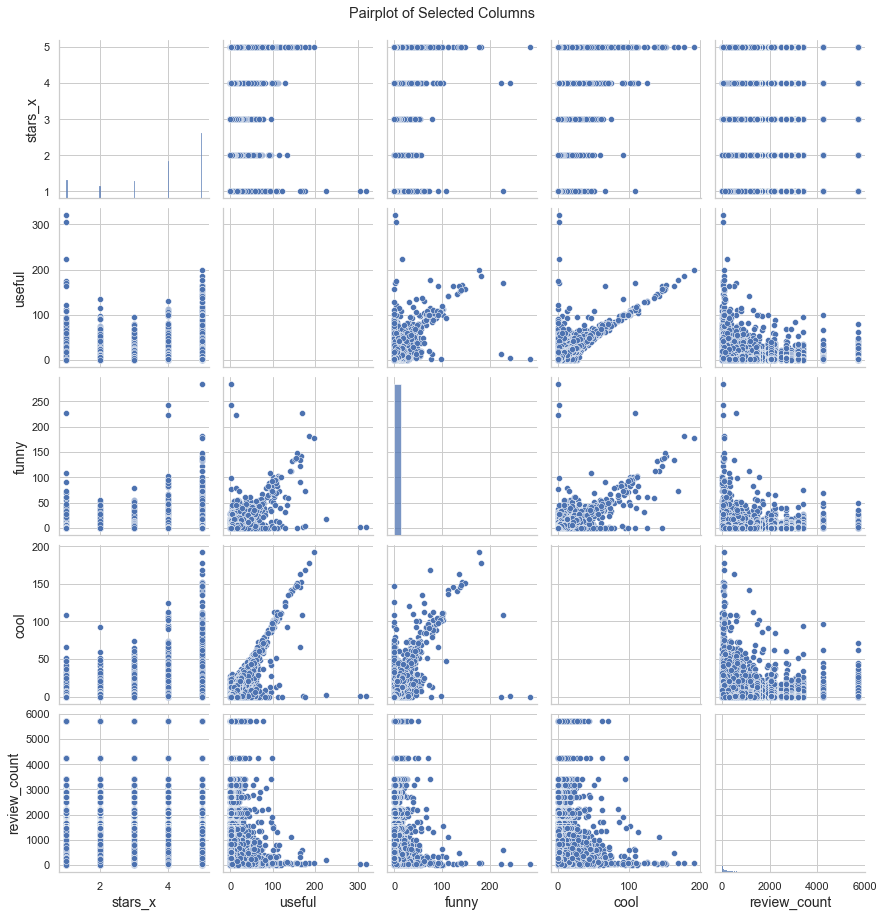

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_merged_df is your DataFrame
selected_columns = ['stars_x', 'useful', 'funny', 'cool', 'review_count']

# Set a custom color palette
custom_palette = sns.color_palette("viridis", as_cmap=True)

# Customize style and context
sns.set(style="whitegrid")
sns.set_context("notebook", rc={"axes.labelsize": 14, "axes.titlesize": 16})

# Create the pairplot
pair_plot = sns.pairplot(final_merged_df[selected_columns], palette=custom_palette)

# Customize additional elements if needed
pair_plot.fig.suptitle("Pairplot of Selected Columns", y=1.02)  # Adjust title position

# Show the plot
plt.show()


In [91]:
final_merged_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [97]:
restaurants_data = final_merged_df

# Find the 10 most popular restaurants by review counts
top_popular_restaurants = restaurants_data.groupby('business_id').agg({'name': 'first','review_count': 'sum'}).nlargest(10, 'review_count')

# Find the 10 highest-rated restaurants by average sum of 'stars_x'
top_rated_restaurants = restaurants_data.groupby('business_id').agg({'name': 'first', 'stars_x': 'mean', 'review_count': 'sum'}).nlargest(10, 'stars_x')

# Display the results
print("Top 10 Most Popular Restaurants by Review Counts:")
print(top_popular_restaurants[['name', 'review_count']])

Top 10 Most Popular Restaurants by Review Counts:
                                           name  review_count
business_id                                                  
ytynqOUb3hjKeJfRj5Tshw  Reading Terminal Market      33044496
PP3BBaVxZLcJU54uP_wL6Q     Pat's King of Steaks      18245250
IkY2ticzHEn4QFn8hQLSWg            Geno's Steaks      11658628
9PZxjhTIU7OgPIzuGi89Ew                   El Vez      10402368
ctHjyadbDQAtUFfkcAFEHw                    Zahav       9725245
6ajnOk0GcY9xbb5Ocaw8Gw                 Barbuzzo       8603782
j-qtdD55OLfSqfsWuQTDJg                     Parc       7962724
sTPueJEwcRDj7ZJmG7okYA           Jim's South St       7575984
AGlh4ZDv6jnoiYfz7At9mw           Dim Sum Garden       7422816
0RuvlgTnKFbX3IK0ZOOocA          Green Eggs Café       7321707


In [93]:
print("\nTop 10 Highest-Rated Restaurants by Average Sum of Stars:")
print(top_rated_restaurants[['name', 'stars_x']])


Top 10 Highest-Rated Restaurants by Average Sum of Stars:
                                                        name  stars_x
business_id                                                          
-FrAoc8_01YaTiwc1zByOA                         Bright Common      5.0
-LoYGjfeHbGklgmiJU9EMQ                  The Other Wedding DJ      5.0
-VOl3gWKvEsjk5-Kht1xWg    Philadelphia Community Acupuncture      5.0
-gWSPVXmvDBbOA0f-hIaeA                      Rose 4 U Florist      5.0
-mc0GB26tKLQhxKpuR3xUw                          Cafe Couleur      5.0
-ooQlxiWp21ubVBlLSzM2w                   Philly Self Defense      5.0
-pPtjsbwgoJjOaI5g5NFNg  Young Children's Center For the Arts      5.0
-puKoJtGHpbPv87jZTR0zQ               NovaCare Rehabilitation      5.0
-rme923YftBvVWv9omz8Ng           The Boudoir By Cheyenne Gil      5.0
-xxFeiRIn6XGs9n8YnR2BQ                          Matin Tailor      5.0


In [98]:
# Find the 10 most popular restaurants by review counts
top_popular_restaurants = restaurants_data.groupby('name').agg({'name': 'first','review_count': 'sum'}).nlargest(10, 'review_count')

# Find the 10 highest-rated restaurants by average sum of 'stars_x'
top_rated_restaurants = restaurants_data.groupby('name').agg({'name': 'first', 'stars_x': 'mean', 'review_count': 'sum'}).nlargest(10, 'stars_x')

# Display the results
print("Top 10 Most Popular Restaurants by Review Counts:")
print(top_popular_restaurants[['name', 'review_count']])

Top 10 Most Popular Restaurants by Review Counts:
                                            name  review_count
name                                                          
Reading Terminal Market  Reading Terminal Market      33044496
Pat's King of Steaks        Pat's King of Steaks      18245250
Geno's Steaks                      Geno's Steaks      11658653
El Vez                                    El Vez      10402368
Zahav                                      Zahav       9725245
Barbuzzo                                Barbuzzo       8603782
Green Eggs Café                  Green Eggs Café       8079987
Parc                                        Parc       7962724
Jim's South St                    Jim's South St       7575984
Dim Sum Garden                    Dim Sum Garden       7569846


In [99]:
print("\nTop 10 Highest-Rated Restaurants by Average Sum of Stars:")
print(top_rated_restaurants[['name', 'stars_x']])


Top 10 Highest-Rated Restaurants by Average Sum of Stars:
                                                                      name  \
name                                                                         
$155 Flat Rate Hauling Trash Removal  $155 Flat Rate Hauling Trash Removal   
13th Street Cocktails                                13th Street Cocktails   
215 Pet Care                                                  215 Pet Care   
3 Girls Towing                                              3 Girls Towing   
60OUT Escape Rooms                                      60OUT Escape Rooms   
8 Limbs Academy                                            8 Limbs Academy   
A & M Auto Body                                            A & M Auto Body   
A Class Act Auto Repair                            A Class Act Auto Repair   
A One Auto Sales & Repair                        A One Auto Sales & Repair   
A to Z Exotic Hardwoods                            A to Z Exotic Hardwoods   

    